In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [2]:
plt.style.use('ggplot')

In [3]:
data = pd.read_csv("online_shoppers_intention.csv")

In [4]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
X = data.drop(["Revenue"], axis=1)
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True


In [150]:
Y = data["Revenue"]
Y.head()

0    False
1    False
2    False
3    False
4    False
Name: Revenue, dtype: bool

In [11]:
label_enc = LabelEncoder()
Y = label_enc.fit_transform(Y)
Y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [12]:
X_encoded = pd.get_dummies(X, columns=["Month", "OperatingSystems", "Browser", "Region", "TrafficType", "VisitorType", "Weekend"], prefix=["Month", "OperatingSystems", "Browser", "Region", "TrafficType", "VisitorType", "Weekend"], drop_first = True )
X_encoded.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1


In [13]:
X_encoded.shape

(12330, 68)

## Random Forest without SMOTE

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(9864, 68) (9864,)
(2466, 68) (2466,)


In [45]:
rf = RandomForestClassifier(n_estimators=1000, random_state = 42)

In [47]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [48]:
predictions = rf.predict(X_test)

In [49]:
np.unique(predictions, return_counts = True)

(array([0, 1], dtype=int64), array([2191,  275], dtype=int64))

In [59]:
rf.score(X_test, y_test)
#print("Accuracy:",metrics.accuracy_score(y_test, predictions))

0.8957826439578265

In [51]:
errors = abs(predictions - y_test)
errors

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [52]:
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.1 degrees.


In [53]:
conf_mat = confusion_matrix(y_test, predictions)
conf_mat

array([[2004,   70],
       [ 187,  205]], dtype=int64)

In [55]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.8957826439578265


In [62]:
feature_imp = pd.Series(rf.feature_importances_,index=X_encoded.columns).sort_values(ascending=False)
feature_imp

PageValues                 3.387211e-01
ExitRates                  8.495721e-02
ProductRelated_Duration    8.389933e-02
ProductRelated             7.113314e-02
Administrative_Duration    5.669961e-02
                               ...     
TrafficType_15             1.341241e-05
TrafficType_18             6.439158e-06
Browser_9                  7.124711e-07
TrafficType_12             1.401293e-08
TrafficType_17             0.000000e+00
Length: 68, dtype: float64

In [68]:
feature_imp.index

Index(['PageValues', 'ExitRates', 'ProductRelated_Duration', 'ProductRelated',
       'Administrative_Duration', 'BounceRates', 'Administrative',
       'Informational_Duration', 'Month_Nov', 'Informational',
       'VisitorType_Returning_Visitor', 'Weekend_True', 'TrafficType_2',
       'Region_3', 'Browser_2', 'OperatingSystems_2', 'OperatingSystems_3',
       'Region_2', 'Month_May', 'Region_4', 'Month_Dec', 'TrafficType_3',
       'Month_Mar', 'Browser_4', 'Region_6', 'TrafficType_4', 'Region_7',
       'TrafficType_8', 'Month_Oct', 'Region_9', 'Month_Sep', 'TrafficType_10',
       'SpecialDay', 'Month_Jul', 'Browser_5', 'Region_8',
       'OperatingSystems_4', 'TrafficType_13', 'TrafficType_5',
       'TrafficType_6', 'Region_5', 'TrafficType_20', 'TrafficType_11',
       'Month_June', 'Browser_6', 'Browser_10', 'Browser_8',
       'OperatingSystems_8', 'TrafficType_7', 'Browser_7', 'VisitorType_Other',
       'Browser_3', 'OperatingSystems_6', 'Browser_13', 'TrafficType_16',
    

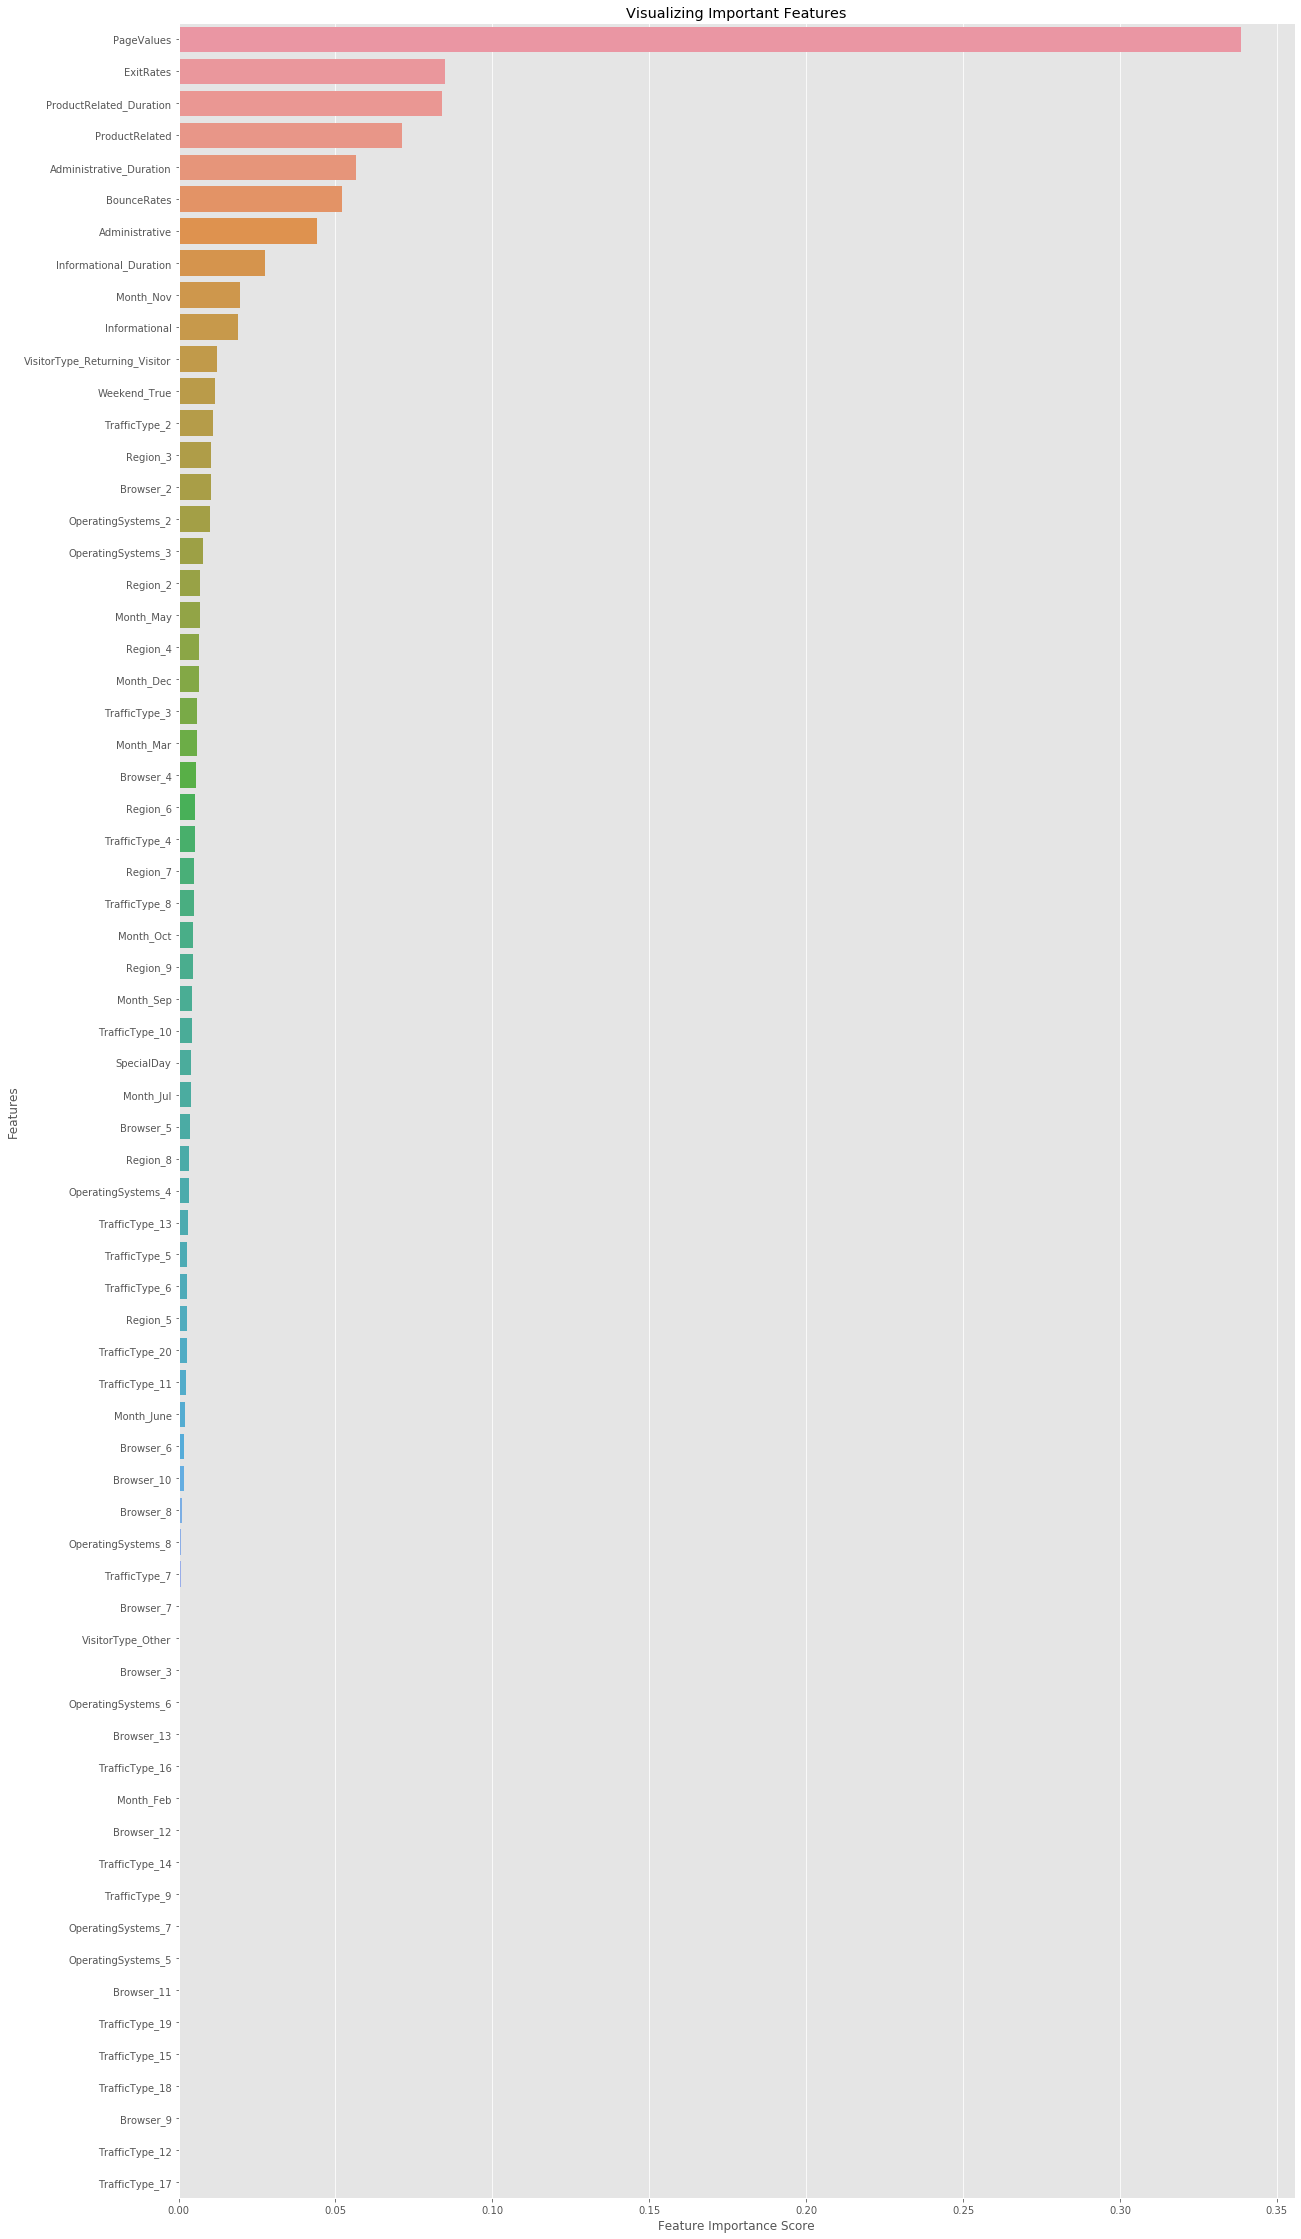

In [67]:
plt.figure(figsize=(20,40))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Random Forest with extracted important features

In [100]:
imp_feature_extracted = feature_imp.index[:40]
imp_feature_extracted

Index(['PageValues', 'ExitRates', 'ProductRelated_Duration', 'ProductRelated',
       'Administrative_Duration', 'BounceRates', 'Administrative',
       'Informational_Duration', 'Month_Nov', 'Informational',
       'VisitorType_Returning_Visitor', 'Weekend_True', 'TrafficType_2',
       'Region_3', 'Browser_2', 'OperatingSystems_2', 'OperatingSystems_3',
       'Region_2', 'Month_May', 'Region_4', 'Month_Dec', 'TrafficType_3',
       'Month_Mar', 'Browser_4', 'Region_6', 'TrafficType_4', 'Region_7',
       'TrafficType_8', 'Month_Oct', 'Region_9', 'Month_Sep', 'TrafficType_10',
       'SpecialDay', 'Month_Jul', 'Browser_5', 'Region_8',
       'OperatingSystems_4', 'TrafficType_13', 'TrafficType_5',
       'TrafficType_6'],
      dtype='object')

In [101]:
imp_ftrs = X_encoded[imp_feature_extracted]

In [119]:
X_train, X_test, y_train, y_test = train_test_split(imp_ftrs, Y, test_size=0.20, random_state=5)

In [120]:
clf=RandomForestClassifier(n_estimators=1000, random_state = 42)

In [121]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [122]:
y_pred=clf.predict(X_test)

In [123]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9051094890510949


In [107]:
## It is evident that extracting important features is able to give increased accuracy.

## Random Forest with SMOTE

In [108]:
from imblearn.over_sampling import SMOTE

In [109]:
oversample = SMOTE()

In [110]:
X_bal, y_bal = oversample.fit_resample(X_encoded, Y)

In [111]:
print(X_bal.shape, y_bal.shape)

(20844, 68) (20844,)


In [112]:
np.unique(y_bal, return_counts = True)

(array([0, 1], dtype=int64), array([10422, 10422], dtype=int64))

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16675, 68) (16675,)
(4169, 68) (4169,)


In [129]:
clf=RandomForestClassifier(n_estimators=1000, random_state = 42)

In [130]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [131]:
y_pred=clf.predict(X_test)

In [132]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9429119692971936


## Random Forest with SMOTE and extracted important features

In [134]:
feature_imp = pd.Series(clf.feature_importances_,index=X_bal.columns).sort_values(ascending=False)
feature_imp

PageValues                 3.846177e-01
ExitRates                  7.152755e-02
ProductRelated_Duration    6.378573e-02
ProductRelated             4.772868e-02
Administrative_Duration    4.469659e-02
                               ...     
TrafficType_18             7.802922e-06
OperatingSystems_7         3.756931e-06
TrafficType_17             1.332838e-09
TrafficType_12             3.006073e-10
Browser_9                  0.000000e+00
Length: 68, dtype: float64

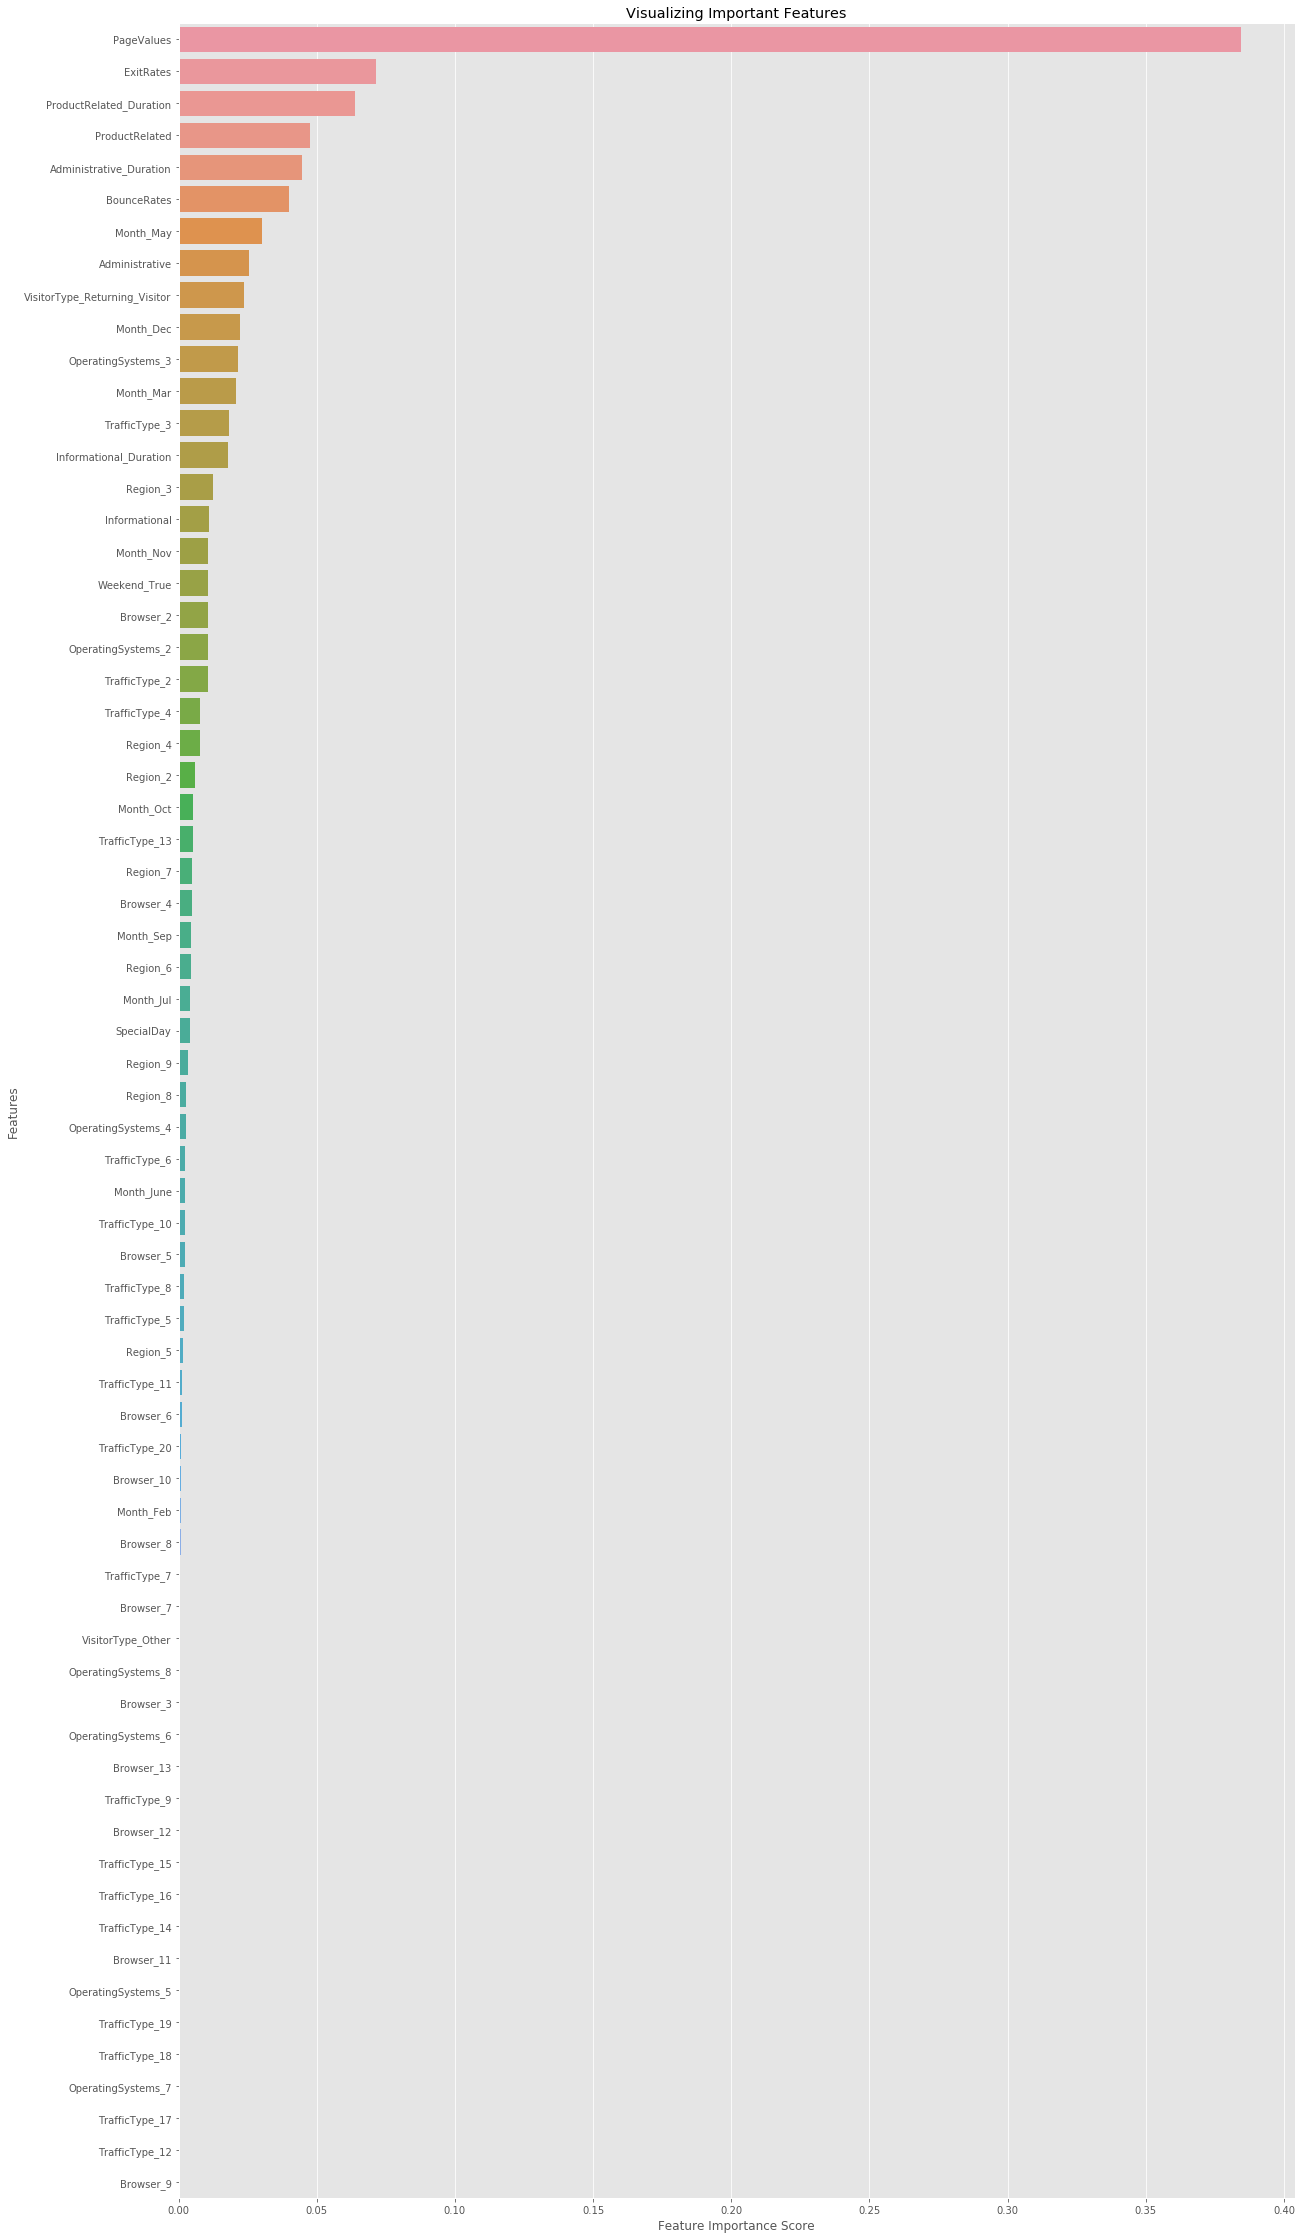

In [135]:
plt.figure(figsize=(20,40))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [143]:
imp_feature_extracted = feature_imp.index[:50]
imp_feature_extracted

Index(['PageValues', 'ExitRates', 'ProductRelated_Duration', 'ProductRelated',
       'Administrative_Duration', 'BounceRates', 'Month_May', 'Administrative',
       'VisitorType_Returning_Visitor', 'Month_Dec', 'OperatingSystems_3',
       'Month_Mar', 'TrafficType_3', 'Informational_Duration', 'Region_3',
       'Informational', 'Month_Nov', 'Weekend_True', 'Browser_2',
       'OperatingSystems_2', 'TrafficType_2', 'TrafficType_4', 'Region_4',
       'Region_2', 'Month_Oct', 'TrafficType_13', 'Region_7', 'Browser_4',
       'Month_Sep', 'Region_6', 'Month_Jul', 'SpecialDay', 'Region_9',
       'Region_8', 'OperatingSystems_4', 'TrafficType_6', 'Month_June',
       'TrafficType_10', 'Browser_5', 'TrafficType_8', 'TrafficType_5',
       'Region_5', 'TrafficType_11', 'Browser_6', 'TrafficType_20',
       'Browser_10', 'Month_Feb', 'Browser_8', 'TrafficType_7', 'Browser_7'],
      dtype='object')

In [144]:
imp_ftrs = X_encoded[imp_feature_extracted]

In [145]:
X_train, X_test, y_train, y_test = train_test_split(imp_ftrs, Y, test_size=0.20, random_state=5)

In [146]:
clf=RandomForestClassifier(n_estimators=1000, random_state = 42)

In [147]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [148]:
y_pred=clf.predict(X_test)

In [149]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9047039740470397
